# Handwritten digit recognition using nearest mean and k-nearest-neighbour (k-NN) classification


## read training data from .txt file
- Training and test sets for 16×16 handwritten digits (0/1 for off/on pixels respectively) containing 600 examples each, for 10 classes with 60 examples per class

In [2]:
fileID = fopen('outputTrain.txt','r');
trainingData = fscanf(fileID,'%d');
%trainingData = trainingData';
fclose(fileID);

## read test data from .txt file

In [3]:
fileID2 = fopen('outputTest.txt','r');
testData = fscanf(fileID2,'%d');
%testdata = testdata';
fclose(fileID2);

## creates 600 examples of 16*16 handwritten digits matrices for training data

In [4]:
for i=1:600
    trn_label(i) = trainingData(257*i);   % class label
    for j=1:16
        trnimages(j,:,i) = trainingData(257*(i-1)+16*(j-1)+1:257*(i-1)+16*j);
       
    end
end

## creates 600 examples of 16*16 handwritten digits matrices for test data

In [5]:
for i=1:600
    test_label(i) = testData(257*i);   % class label
    for j=1:16
        testimages(j,:,i) = testData(257*(i-1)+16*(j-1)+1:257*(i-1)+16*j);
       
    end
end

In [6]:
for i=1:10
    class_index(i,:) = find(trn_label(:)== i-1);
end

## Nearest-Neighbour
- For each class, calculate the average class image over the training set and use it for classification.

In [7]:
% compute average image
for i=1:10
    for j=1:16
        for k=1:16
            avg_image(j,k,i) = sum(trnimages(j,k,class_index(i,:)))/60;
        end
    end
end

for i=1:600
    for j=1:10
        distances(j) = sum(sum((testimages(:,:,i) - avg_image(:,:,j)).^2));  % test
        distances0(j) = sum(sum((trnimages(:,:,i) - avg_image(:,:,j)).^2));  % tranining
    end
    predict_label_NN(i) = find(min(distances)== distances)-1;       % test
    predict_label_NN0(i) = find(min(distances0)== distances0)-1;    % tranining
end

## compute confusion matrix for NN (training)

In [8]:
Conf0 = zeros(10,10);
for i=1:600
        Conf0(trn_label(i)+1,predict_label_NN0(i)+1) = Conf0(trn_label(i)+1,predict_label_NN0(i)+1)+1;
end
Conf0


Conf0 =

    57     0     0     0     0     3     0     0     0     0
     0    57     3     0     0     0     0     0     0     0
     0     0    56     3     0     0     0     1     0     0
     0     0     0    55     0     5     0     0     0     0
     0     0     0     0    56     0     1     0     0     3
     0     0     0     6     0    50     1     0     0     3
     0     0     0     1     0     0    57     0     2     0
     0     0     6     0     0     0     0    53     0     1
     0     0     0     0     0     1     0     0    52     7
     0     0     0     0     3     0     0     0     2    55




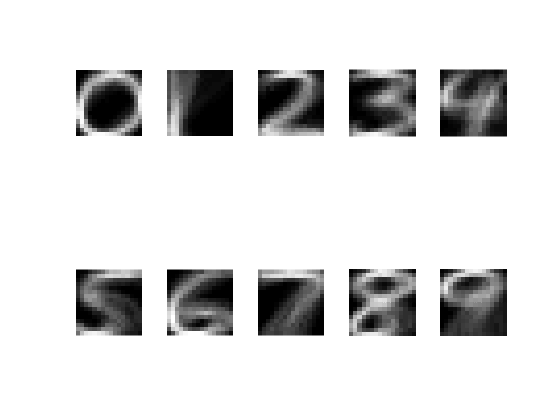

In [9]:
figure('Name','Average Images','NumberTitle','off'),
for i=1:10
    subplot(2,5,i),imshow(avg_image(:,:,i));
end

## compute confusion matrix for NN (test)

In [10]:
Conf = zeros(10,10);
for i=1:600
        Conf(test_label(i)+1,predict_label_NN(i)+1) = Conf(test_label(i)+1,predict_label_NN(i)+1)+1;
end
Conf


Conf =

    50     0     0     1     0     9     0     0     0     0
     0    58     2     0     0     0     0     0     0     0
     0     1    50     5     0     0     0     2     1     1
     0     0     1    51     0     4     0     3     1     0
     0     0     0     0    48     0     3     0     0     9
     0     1     0     5     0    51     0     0     0     3
     0     0     0     0     0     0    57     0     3     0
     0     2     5     0     0     0     0    53     0     0
     1     0     0     1     0     2     0     0    49     7
     0     1     0     0     2     0     0     4     0    53




## k-NN

In [11]:
k = [1 3 5 7 9];
A = zeros(length(k),10);
A1 = zeros(length(k),10);


for e=1:length(k)
    for i=1:600
        for j=1:600
            distances2(i,j) = sum(sum((testimages(:,:,i) - trnimages(:,:,j)).^2));
            distances1(i,j) = sum(sum((trnimages(:,:,i) - trnimages(:,:,j)).^2));
        end
        sorted_distances2(i,:) = sort(distances2(i,:));
        sorted_distances1(i,:) = sort(distances1(i,:));
    %    category(i,:) = sorted_distances2(i,1:k(e));
        for m = 1:k(e)
    %        temp = find (category(i,m)==distances2(i,:));
            temp = find (sorted_distances2(i,m)==distances2(i,:));
            temp1 = find (sorted_distances1(i,m)==distances1(i,:));
            A(e,trn_label(temp)+1) = A(e,trn_label(temp)+1) +1 ;
            A1(e,trn_label(temp1)+1) = A1(e,trn_label(temp1)+1) +1 ;
        end
      [val,ind] = max(A(e,:));
      [val0,ind0] = max(A1(e,:));
      predict_label_kNN(e,i) = ind - 1;
      predict_label_kNN0(e,i) = ind0 - 1;
      A = zeros(length(k),10);
      A1 = zeros(length(k),10);
    end
 
end

## compute confusion matrix for k-NN (training)

In [12]:
Conf1 = zeros(10,10,length(k));
for e=1:length(k)
    for i=1:600
        Conf1(trn_label(i)+1,predict_label_kNN0(e,i)+1,e) = Conf1(trn_label(i)+1,predict_label_kNN0(e,i)+1,e)+1;
    end
end
Conf1                  


Conf1(:,:,1) =

    60     0     0     0     0     0     0     0     0     0
     0    60     0     0     0     0     0     0     0     0
     0     0    60     0     0     0     0     0     0     0
     0     0     0    60     0     0     0     0     0     0
     0     0     0     0    60     0     0     0     0     0
     0     0     0     0     0    60     0     0     0     0
     0     0     0     0     0     0    60     0     0     0
     0     0     0     0     0     0     0    60     0     0
     0     0     0     0     0     0     0     0    60     0
     0     0     0     0     0     0     0     0     0    60


Conf1(:,:,2) =

    60     0     0     0     0     0     0     0     0     0
     0    60     0     0     0     0     0     0     0     0
     0     0    59     0     0     0     0     1     0     0
     0     0     0    60     0     0     0     0     0     0
     0     1     0     0    56     0     0     0     0     3
     0     0     0     0     0    59     1     0  

## compute confusion matrix for k-NN (test)

In [13]:
Conf2 = zeros(10,10,length(k));
for e=1:length(k)
    for i=1:600
        Conf2(test_label(i)+1,predict_label_kNN(e,i)+1,e) = Conf2(test_label(i)+1,predict_label_kNN(e,i)+1,e)+1;
    end
end
Conf2 


Conf2(:,:,1) =

    59     0     0     0     0     0     1     0     0     0
     0    60     0     0     0     0     0     0     0     0
     0     0    58     0     0     0     0     2     0     0
     0     0     1    59     0     0     0     0     0     0
     0     5     1     0    47     0     0     0     0     7
     0     1     0     1     0    55     3     0     0     0
     1     0     0     0     0     0    59     0     0     0
     0     2     0     0     0     0     0    58     0     0
     1     0     2     4     0     2     0     0    50     1
     0     0     0     0     1     0     0     5     0    54


Conf2(:,:,2) =

    59     0     0     0     0     0     1     0     0     0
     0    60     0     0     0     0     0     0     0     0
     0     0    58     0     0     0     0     2     0     0
     0     0     1    58     0     1     0     0     0     0
     0     5     0     0    49     0     0     0     0     6
     0     1     0     2     0    55     2     0  